<a href="https://colab.research.google.com/github/SamTheSapien/Trabalhos_FCT_NOVA/blob/main/ProjectoPAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projecto PAD 20/21



#G8

Samuel Viegas - 53600

Rodrigo Gomes -  52596

Gonçalo Severino - 52768

Dataset: Hepatitis C Prediction Dataset

Link: https://www.kaggle.com/fedesoriano/hepatitis-c-dataset

Outros links:

Fast PCA: https://biit.cs.ut.ee/clustvis/

Data Visualization: https://app.rawgraphs.io/

# Introduction and Preparation

In [ ]:
# Colab Setup
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# After downloading the shared starting point folder as a Zip
# Unzip it and re-upload it to a location on your GDrive

# This command copies the contents from the folder you uploaded to GDrive, to the colab working dir
!cp -r /content/drive/MyDrive/1-Projecto/data /content

# Add working dir to the sys path, so that we can find the aux python files when running the Notebook
import sys
if not '/content/data' in sys.path:
  sys.path += ['/content/data']

# All the imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
import math
from plotly.offline import plot
from plotly.graph_objs import *

# Plot Style
plt.style.use('seaborn-darkgrid')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Prepare Data and Dataset

In [ ]:
#Dataset is now a pandas Dataframe
dataset = pd.read_csv('data/data.zip')
dataset.head()
##https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
features=dataset.columns.values
print("Our features:")
print(features)
print("Our classes:")
print(dataset['Category'].unique())

Our features:
['Unnamed: 0' 'Category' 'Age' 'Sex' 'ALB' 'ALP' 'ALT' 'AST' 'BIL' 'CHE'
 'CHOL' 'CREA' 'GGT' 'PROT']
Our classes:
['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


Take off ID and categorical values

In [ ]:
category = dataset.pop('Category')
new_Dataset=dataset.drop(columns=['Unnamed: 0','Sex'])
new_Dataset.insert(len(new_Dataset.columns),'Category',category)
print(new_Dataset.head())
size=new_Dataset.size
print("Cases in dataset")
print(f"Size is {size}")
pureSize=new_Dataset.dropna().size
print(f"Size without NAN values is {pureSize}")

   Age   ALB   ALP   ALT   AST  ...  CHOL   CREA   GGT  PROT       Category
0   32  38.5  52.5   7.7  22.1  ...  3.23  106.0  12.1  69.0  0=Blood Donor
1   32  38.5  70.3  18.0  24.7  ...  4.80   74.0  15.6  76.5  0=Blood Donor
2   32  46.9  74.7  36.2  52.6  ...  5.20   86.0  33.2  79.3  0=Blood Donor
3   32  43.2  52.0  30.6  22.6  ...  4.74   80.0  33.8  75.7  0=Blood Donor
4   32  39.2  74.1  32.6  24.8  ...  4.32   76.0  29.9  68.7  0=Blood Donor

[5 rows x 12 columns]
Cases in dataset
Size is 7380
Size without NAN values is 7068


## Label
ALB - albumin (transport protein) (g/L)
<br>
ALP - alkaline phosphatase (enzyme, liver) (U/L)
<br>
ALT - alanine transaminase (enzyme, liver) (U/L)
<br>
AST - aspartate aminotransferase (enzyme, liver) (U/L)
<br>
BIL - bilirubin (g/L)
<br>
CHE - cholinesterase (enzyme, chemical synapses)(U/L)
<br>
CHOL - cholesterol (mmol/L)
<br>
CREA - creatinine (mL/min)
<br>
GGT - gamma-glutamyl transferase (enzyme, liver) (U/L)
<br>
PROT - albumin and globulin (g/L)

#Regression Analysis

Search for a linear relationship in dataset

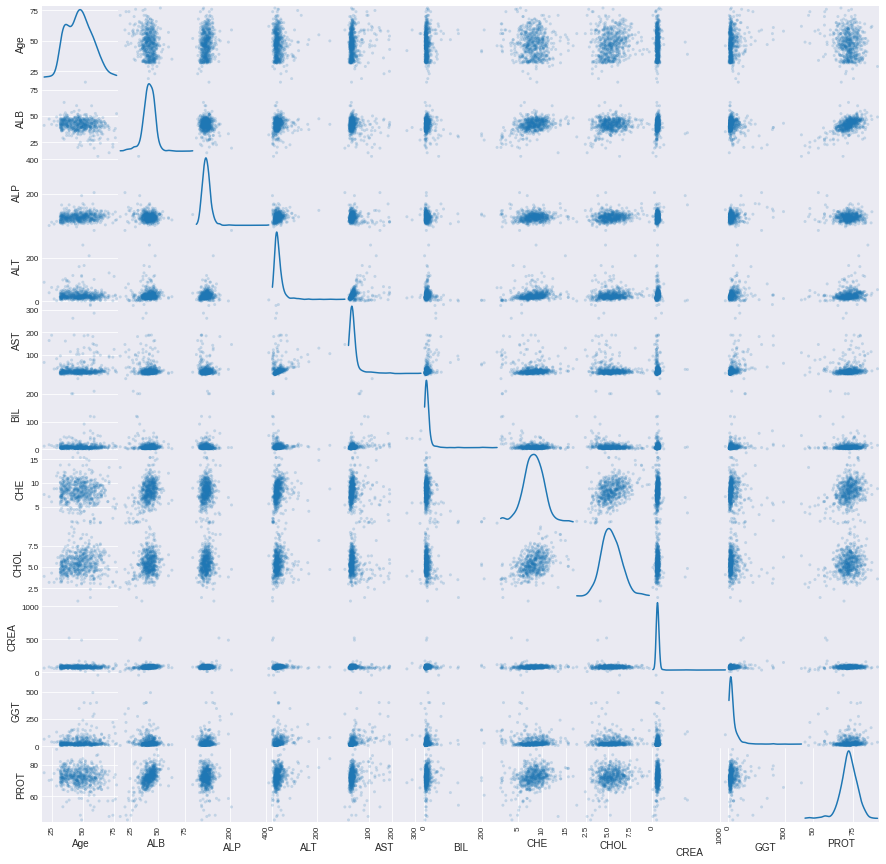

In [ ]:
# Scatter matrix
pd.plotting.scatter_matrix(new_Dataset,alpha = 0.2, figsize  = [15, 15], diagonal = 'kde')
print('')

## a) Select features
Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐plot, and make a comment on it.

In [ ]:
two_features = new_Dataset[['PROT','ALB']]
two_features = two_features.dropna()

#X = np.array(two_features['PROT'])
#y = np.array(two_features['ALB']).reshape(-1,1)
X = np.array(two_features['PROT']).reshape(-1,1)
y = np.array(two_features['ALB'])
print(X[:5]) # Column vector
print(y[:5]) # Line vector

[[69. ]
 [76.5]
 [79.3]
 [75.7]
 [68.7]]
[38.5 38.5 46.9 43.2 39.2]


(613, 1)


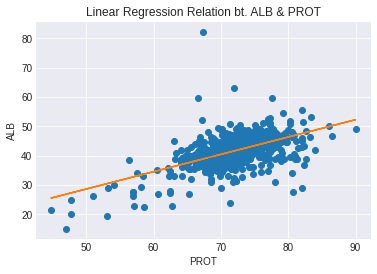

In [ ]:
lr_fit = ols('ALB ~ PROT', data=dataset).fit()
y_pred = lr_fit.predict()
plt.plot(X, y, 'o')
plt.plot(X,y_pred)
plt.xlabel("PROT")
plt.ylabel("ALB")
plt.title("Linear Regression Relation bt. ALB & PROT")
print(X.shape)
plt.show()


Apresenta um forma linear muito boa, mas com alguns outliers. No entanto são dados lineares muito bons.

## b) Normal probability plot
Build a linear regression of one of the features over the other. Obtain a normal probability plot of the standardized residuals from this regression. Does the normal probability plot indicate acceptable normality, or is there any skewness? If a skewness, what is the type of it?

X shape: (613, 1)
Estimated coefficient: 0.5783508381861523
New shape of coefficients array: (1, 1)
(613, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



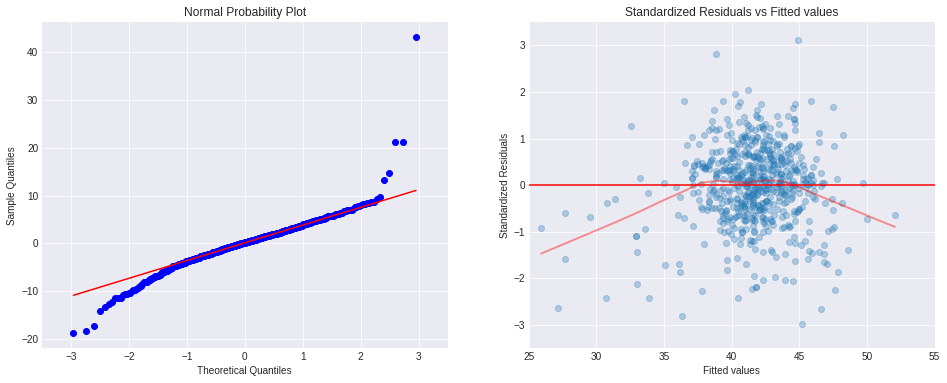

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy import dot
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot

x=X
#x=X.reshape(-1,1)
print(f"X shape: {x.shape}")
beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficient:', beta[0])
beta = np.reshape(beta,(-1,1))
print('New shape of coefficients array:',beta.shape)

fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x,beta)
print(predictions.shape)
residuals = y - predictions[:,0]
degrees_of_freedom = len(y) - x.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Normal Probability Plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))
mean_independent_variable = np.mean(x)
leverage = ( (1/len(x)) 
             + (((x - mean_independent_variable)**2) 
                / np.sum((x - mean_independent_variable)**2)) )
leverage=leverage.flatten()
standardized_rediduals = residuals / (residuals_standard_error * np.sqrt( 1 - leverage))

sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(25,55)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');

**Normal Probability Plot:** Está excelente, captura quase na integridade os dados. Isto significa que os nossos dados se aproximam muito de uma distribuição normal. Iremos trabalhar com estes dados mais á frente.

**Standerized residuals VS Fitted values:**
Apresentam uma boa forma circular. E não apresentam padrões nos dados, pelo que é um bom indicador de existência de Regressão linear

## c) Linear Regression of the log
Take the natural log of both of the variables and perform a linear regression on the transformed features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss if this probability plot indicates an acceptable level of normality?

In [ ]:
#Do regression analysis with a Log transformation on BOTH features.
#Don't forget to eliminate the zero values' cases.  
mask = y != 0
y_masked = y[mask]
x_masked = x[mask]
x_masked = np.log(x_masked)
y_masked = np.log(y_masked)
print(x_masked[:5]) # Line vector
print(y_masked[:5]) # Column vector

[[4.2341065 ]
 [4.33729074]
 [4.37323813]
 [4.32677816]
 [4.2297492 ]]
[3.65065824 3.65065824 3.84801768 3.7658405  3.66867675]


Estimated coefficients: [0.87024486]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



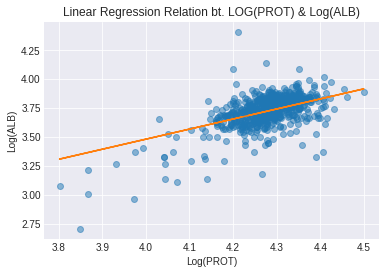

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



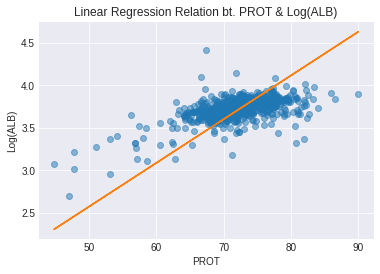

In [ ]:
# estimate the coefficients
beta = np.linalg.lstsq(x_masked, y_masked)[0]
print('Estimated coefficients:', beta)
beta = np.reshape(beta,(-1,1))

# compute new predictions_log
predictions_log = dot(x_masked,beta) 

ax = sns.regplot(x=x_masked, y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Log(PROT)', 
       ylabel='Log(ALB)',
       title='Linear Regression Relation bt. LOG(PROT) & Log(ALB)');
plt.plot(x_masked, predictions_log) # overlay a line plot over a scatter plot 
plt.show()

# with only the log of the dependent variable
b1 = np.linalg.lstsq(x, y_masked)[0]
pred1 = dot(x,b1) 
ax = sns.regplot(x=x, y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='PROT', 
       ylabel='Log(ALB)',
       title='Linear Regression Relation bt. PROT & Log(ALB)');
plt.plot(x, pred1) # overlay a line plot over a scatter plot 
plt.show()

X shape: (613, 1)
Estimated coefficient: 0.8702448582844695
New shape of coefficients array: (1, 1)
(613, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



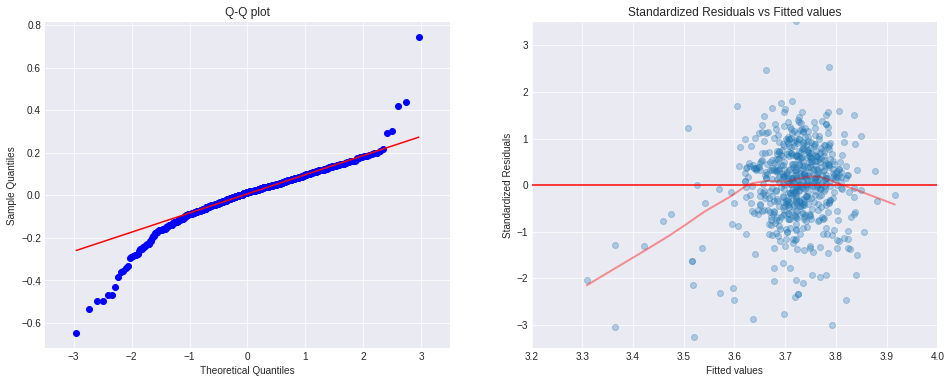

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy import dot
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot


#x=X.reshape(-1,1)
print(f"X shape: {x_masked.shape}")
beta = np.linalg.lstsq(x_masked, y_masked)[0]
print('Estimated coefficient:', beta[0])
beta = np.reshape(beta,(-1,1))
print('New shape of coefficients array:',beta.shape)

fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions_log = dot(x_masked,beta)
print(predictions_log.shape)
residuals = y_masked - predictions_log[:,0]
degrees_of_freedom = len(y_masked) - x_masked.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))
mean_independent_variable = np.mean(x_masked)
leverage = ( (1/len(x_masked)) 
             + (((x_masked - mean_independent_variable)**2) 
                / np.sum((x_masked - mean_independent_variable)**2)) )
leverage=leverage.flatten()
standardized_rediduals = residuals / (residuals_standard_error * np.sqrt( 1 - leverage))

sns.regplot(x=predictions_log[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(3.2,4.0)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');

**Q-Q plot:**
Embora o gráfico dos logaritmos de ambas as features apresente uma boa forma, o seu Q-Q plot demonstra maior fraqueza em relação ao das features normais, nomeadamente no incio da cauda.


**Standerized residuals VS Fitted values:**
Apresenta uma forma semelhante.

## d) Interpret the regression equation
Write the population regression equation for your model. Interpret the meaning of the values of the parameters β0 and β1.

$\hat{Y} = \beta_0 + \beta_1X$.  
Calculate  $\beta_0$ by padding $X$ with a column of ones.

In [ ]:
ones_vector = np.ones(len(x)) 
# append constant term as a column of x
x_withOnes = np.c_[ones_vector, x]
print(x_withOnes[:5])
print(x_withOnes.shape)

[[ 1.  69. ]
 [ 1.  76.5]
 [ 1.  79.3]
 [ 1.  75.7]
 [ 1.  68.7]]
(613, 2)


In [ ]:
beta = np.linalg.lstsq(x_withOnes, y)[0]
print('Estimated coefficients:', beta)
print('Y = B0 + B1X')
print(f"Y = {beta[0]} + {beta[1]} X")


Estimated coefficients: [-0.85309814  0.59012796]
Y = B0 + B1X
Y = -0.8530981447049469 + 0.5901279588257148 X


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



**Y = B0 + B1X**

**Y = -0.8530981447049469 + 0.5901279588257148 X**

**β1**: 0.59012796

É o declive da regressão linear.


**β0**: -0.85309814   
É a ordenada na origem da regressão linear.

## e) Correlation and determinacy coefficients
Find the correlation and determinacy coefficients. Analyse and comment on the meaning of both.

In [ ]:
correlation_matrix = np.corrcoef(np.squeeze(y), np.squeeze(y_pred))
print('Correlation coefficient:',correlation_matrix[0,1])

print('Determinacy coefficient:', lr_fit.rsquared)

Correlation coefficient: 0.5571969118282853
Determinacy coefficient: 0.31046839855097796


**Correlation coefficient**: 0.57072567974868
<br>
A correlation coefficient between 0.33 and 0.7 usually indicates that there is a mildly positively correlation between the values.
<br>
<br>
**Determinacy coefficient**: 0.325727801524593
<br>
This value means that the model can only explain 33% of the variation of the dependent variable around it's mean.
<br>
A score under 0.5 is usually considered bad.

##f) Test the statistical hypothesis
Test the statistical hypothesis for determining whether a linear relationship exists between the chosen variables.

In [ ]:
tvalues = lr_fit.tvalues
pvalues = lr_fit.pvalues

print('Test statistc for coefficient estimate 0:',np.round(tvalues[0], 3),'| P-value:', np.round(pvalues[0],4))
print('Test statistc for coefficient estimate 1:',np.round(tvalues[1], 3),'| P-value:', np.round(pvalues[1],4))

Test statistc for coefficient estimate 0: -0.332 | P-value: 0.74
Test statistc for coefficient estimate 1: 16.586 | P-value: 0.0


Null hypothesis: there is no linear relashionship between PROT and ALB.
<br>
Lets consider a rejection threshold (alpha) of 0.05.
<br>
<br>
β1 -> T-value: 16.586 | P-value: 0.0
<br>
<br>
P-value is smaller that the threshold, meaning that we can not accept the null hypothesis.
<br>
In this case, the t-test with the value of β1 indicates that exist a linear relationship between PROT and ALB.

##g) Confidence interval for the unknown true slope

Construct and interpret a 95% confidence interval for the unknown true slope of the regression line.

In [ ]:
b1 = lr_fit.params[1]
sb1 = lr_fit.bse[1]
print('95% confidence interval for the unknown true slope: (',
      np.round(b1 - 1.963*sb1, 2),',',
      np.round(b1 + 1.963*sb1, 2),')')

95% confidence interval for the unknown true slope: ( 0.52 , 0.66 )


This result means that we are 95% confident that for every additional PROT unit, ALB grows between 0.52 an 0.66 units.

## h) Confidence interval for the population correlation coefficient
Construct a 95% confidence interval for the population correlation coefficient. Interpret the results.

In [ ]:
degrees_of_freedom = len(y) - x.shape[1]
r_quadr=lr_fit.rsquared
r=math.sqrt(lr_fit.rsquared)
n= len(y)
t=2.247       #t_0.025_611

print('95% confidence interval for the population correlation coefficient: (',
      np.round(r- t *math.sqrt( (1-r_quadr)/(n-2)) ,2) ,',',
      np.round(r+ t *math.sqrt( (1-r_quadr)/(n-2)) ,2) ,')')                 

95% confidence interval for the population correlation coefficient: ( 0.48 , 0.63 )


Because both endpoints of the confidence interval are positive, the quantity (g/L) of Prot and Alb in the blood are positively correlated, with confidence level of 95%.

## i) Confidence interval for the mean of the y‐variable at a fixed value
Construct and interpret a 95% confidence interval for the mean of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.

In [ ]:
n= len(y)
t= 1.963  #t_0.05_611
residuals = y - predictions[:,0]
s = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))  #residuals_standard_error

x_p= 74
x=X
x_bar=np.mean(x)
y_p = -0.8530981447049469 + 0.5901279588257148 * x_p
somatorio= np.sum( (x-np.mean(x))**2)

print('95% confidence interval for the mean of the y‐variable when x= 74 (',
      np.round( y_p - t * s * math.sqrt( 1/n + ( (x_p-x_bar)**2 )/somatorio ) ,2) ,',',
      np.round( y_p + t * s * math.sqrt( 1/n + ( (x_p-x_bar)**2 )/somatorio ) ,2) ,')')




95% confidence interval for the mean of the y‐variable when x= 74 ( 42.42 , 43.22 )


So we can conclude with 95% confidence that the mean quantity of Alb in the blood of all people with the Prot quantity of 74 g/L lies between 42.42 and 43.22 g/L.

## j) Prediction interval for a randomly chosen value of the y‐variable at a fixed value
Construct and interpret a 95% prediction interval for a randomly chosen value of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.

In [ ]:
n= len(y)
t= 1.963  #t_0.05_611
residuals = y - predictions[:,0]
s = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))  #residuals_standard_error
x=X
x_p= 74
x_bar=np.mean(x)
y_p = -0.8530981447049469 + 0.5901279588257148 * x_p
somatorio= np.sum( (x-np.mean(x))**2)

print('95% confidence interval for the mean of the y‐variable when x= 74 (',
      np.round( y_p - t * s * math.sqrt( 1+ 1/n + ( (x_p-x_bar)**2 )/somatorio ) ,2) ,',',
      np.round( y_p + t * s * math.sqrt( 1+ 1/n + ( (x_p-x_bar)**2 )/somatorio ) ,2) ,')')

95% confidence interval for the mean of the y‐variable when x= 74 ( 33.48 , 52.15 )


So we can predict with 95% confidence that the quantity of Alb in the blood of a randomly choosen person with the Prot quantity of 74 g/L lies between 33.48 and 52.15 g/L.

# PCA Analysis
Select a subset of 3 to 6 features related to the same aspect of the phenomenon to which your data set relates to. Explain your choice.

In [ ]:
#pca_features = new_Dataset[['ALP', 'ALT', 'AST', 'GGT', 'Category'] ]
pca_features = new_Dataset.dropna()
category = pd.factorize(pca_features['Category'], sort = True)[0]
x = pca_features.drop(columns = ['Category'])

In [ ]:
print(category)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

[ALP, ALT, AST, GGT]
<br>
This four values measure different enzymes found more frequently on the liver. All of them are in unit per litter. 

## a) Visualize the data 
Visualize the data over these features in 2D/3D PC plane using two types of normalization: by range and by standard deviations.

In [ ]:
from sklearn import preprocessing

x_normalize = preprocessing.normalize(x)
x_standardize = preprocessing.StandardScaler().fit_transform(x)

## b) PCA or SVD
Choose between conventional PCA or SVD for the visualization. Make a comment whether one of the normalizations is better and why.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from mpl_toolkits.mplot3d import axes3d
import matplotlib.patches as mpatches

colors = ['limegreen', 'darkgreen', 'red', 'yellow', 'orange']

PCA in 2D

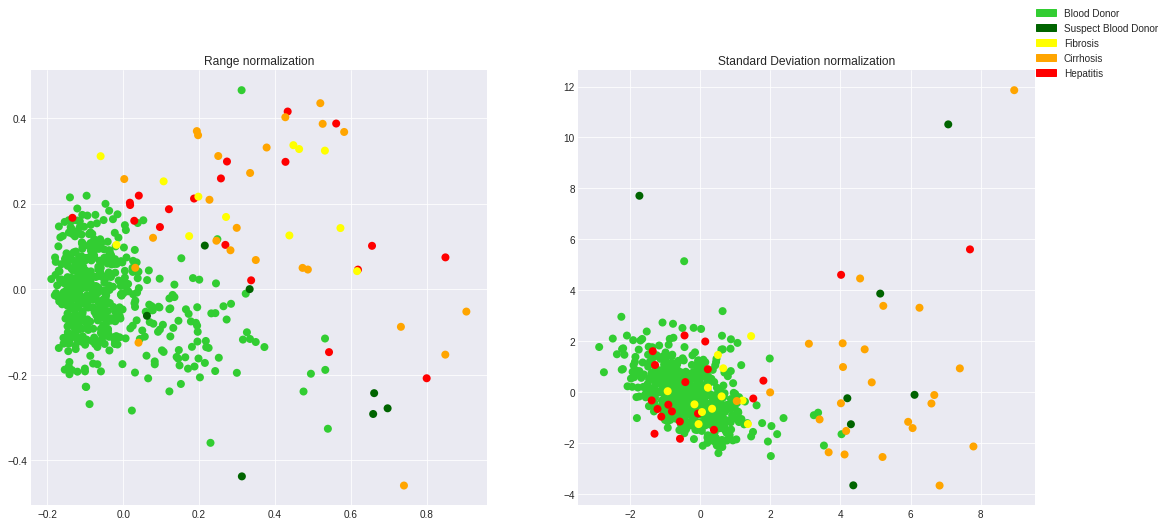

In [ ]:
pca_n_2d = PCA(n_components=2)
x_n_2d = pca_n_2d.fit_transform(x_normalize)
pca_s_2d = PCA(n_components=2)
x_s_2d = pca_s_2d.fit_transform(x_standardize)

fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(18,8))

ax1.scatter(x_n_2d[:,0], x_n_2d[:,1], c=category, 
            cmap=ListedColormap(colors), 
            linewidths=2)
ax1.set_title('Range normalization')

ax2.scatter(x_s_2d[:,0], x_s_2d[:,1], c=category, 
            cmap=ListedColormap(colors), 
            linewidths=2)
ax2.set_title('Standard Deviation normalization')

# Legend
mpatch1 = mpatches.Patch(color='limegreen', label='Blood Donor')
mpatch2 = mpatches.Patch(color='darkgreen', label='Suspect Blood Donor')
mpatch3 = mpatches.Patch(color='yellow', label='Fibrosis')
mpatch4 = mpatches.Patch(color='orange', label='Cirrhosis')
mpatch5 = mpatches.Patch(color='red', label='Hepatitis')
fig.legend(handles=[mpatch1, mpatch2, mpatch3, mpatch4, mpatch5])

plt.show()

SVD in 2D

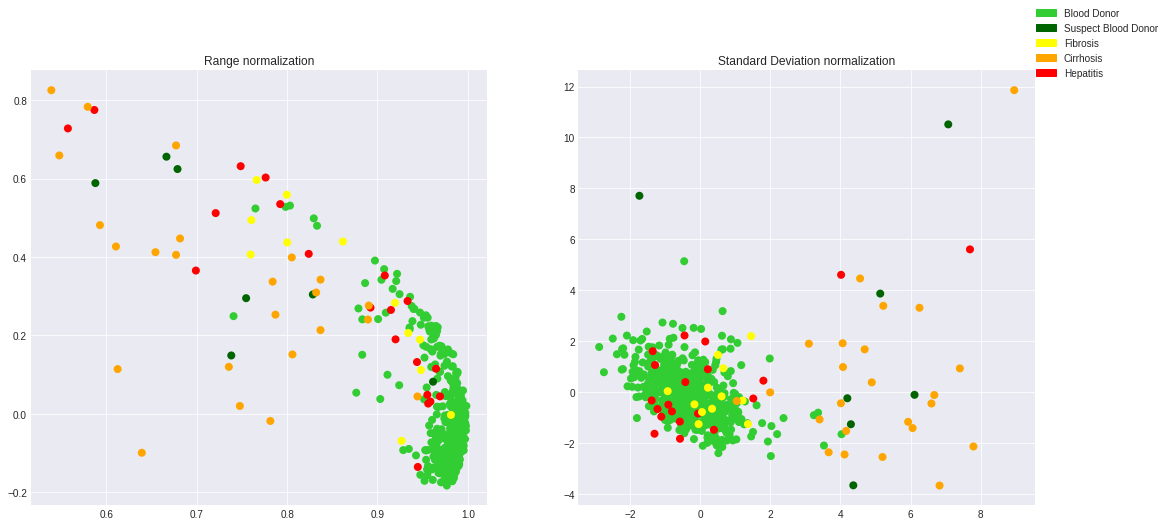

In [ ]:
svd_n_2d = TruncatedSVD(n_components=2)
x_n_2d = svd_n_2d.fit_transform(x_normalize)
svd_s_2d = TruncatedSVD(n_components=2)
x_s_2d = svd_s_2d.fit_transform(x_standardize)

fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(18,8))

ax1.scatter(x_n_2d[:,0], x_n_2d[:,1], c=category, 
            cmap=ListedColormap(colors), 
            linewidths=2)
ax1.set_title('Range normalization')

ax2.scatter(x_s_2d[:,0], x_s_2d[:,1], c=category, 
            cmap=ListedColormap(colors), 
            linewidths=2)
ax2.set_title('Standard Deviation normalization')

# Legend
mpatch1 = mpatches.Patch(color='limegreen', label='Blood Donor')
mpatch2 = mpatches.Patch(color='darkgreen', label='Suspect Blood Donor')
mpatch3 = mpatches.Patch(color='yellow', label='Fibrosis')
mpatch4 = mpatches.Patch(color='orange', label='Cirrhosis')
mpatch5 = mpatches.Patch(color='red', label='Hepatitis')
fig.legend(handles=[mpatch1, mpatch2, mpatch3, mpatch4, mpatch5])

plt.show()

PCA in 3D

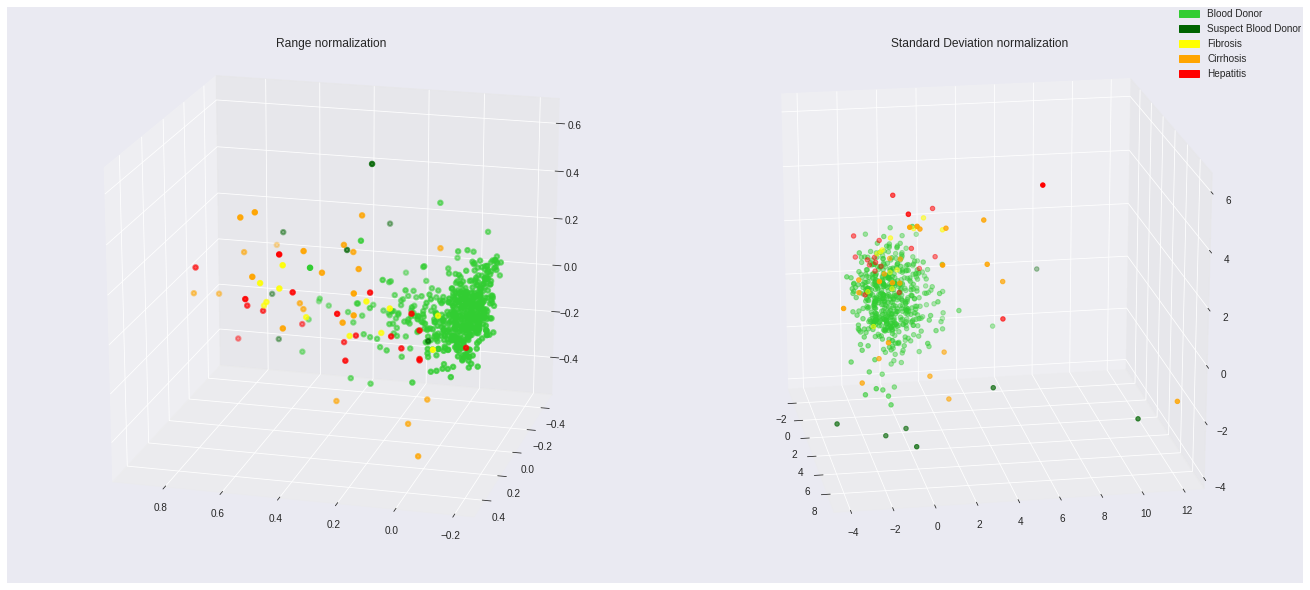

In [ ]:
pca_n_3d = PCA(n_components=3)
x_n_pca_3d = pca_n_3d.fit_transform(x_normalize)
pca_s_3d = PCA(n_components=3)
x_s_pca_3d = pca_s_3d.fit_transform(x_standardize)

fig = plt.figure( figsize=(18,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(x_n_pca_3d[:,0], x_n_pca_3d[:,1],x_n_pca_3d[:,2], c=category, 
            cmap=ListedColormap(colors), 
            linewidths=2)
ax1.set_title('Range normalization')

ax1.view_init(20, 105)

ax2.scatter(x_s_pca_3d[:,0], x_s_pca_3d[:,1],x_s_pca_3d[:,2], c=category,
            cmap=ListedColormap(colors), 
            linewidths=1)
ax2.set_title('Standard Deviation normalization')   
ax2.view_init(20, 350)

# Legend
mpatch1 = mpatches.Patch(color='limegreen', label='Blood Donor')
mpatch2 = mpatches.Patch(color='darkgreen', label='Suspect Blood Donor')
mpatch3 = mpatches.Patch(color='yellow', label='Fibrosis')
mpatch4 = mpatches.Patch(color='orange', label='Cirrhosis')
mpatch5 = mpatches.Patch(color='red', label='Hepatitis')
fig.legend(handles=[mpatch1, mpatch2, mpatch3, mpatch4, mpatch5])

fig.tight_layout(pad=0.0)
plt.show()

SVD in 3D

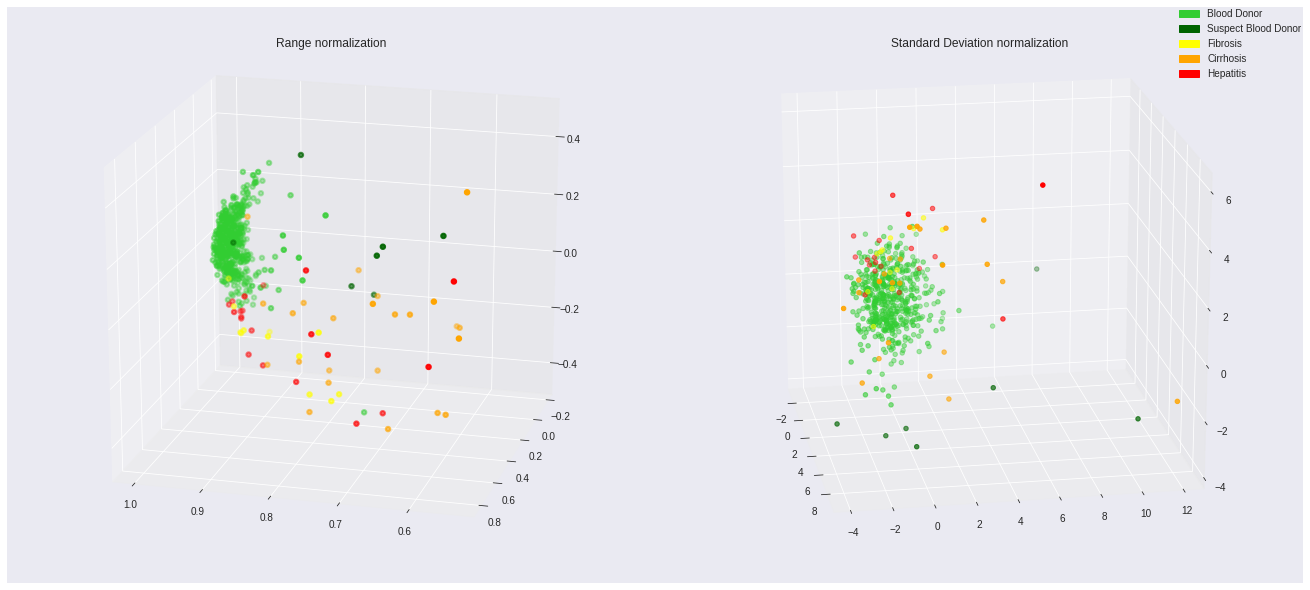

In [ ]:
svd_n_3d = TruncatedSVD(n_components=3)
x_n_3d = svd_n_3d.fit_transform(x_normalize)
svd_s_3d = TruncatedSVD(n_components=3)
x_s_3d = svd_s_3d.fit_transform(x_standardize)

fig = plt.figure( figsize=(18,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(x_n_3d[:,0], x_n_3d[:,1],x_n_3d[:,2], c=category, 
            cmap=ListedColormap(colors), 
            linewidths=2)
ax1.set_title('Range normalization')

ax1.view_init(20, 105)

ax2.scatter(x_s_3d[:,0], x_s_3d[:,1],x_s_3d[:,2], c=category,
            cmap=ListedColormap(colors), 
            linewidths=1)
ax2.set_title('Standard Deviation normalization')   
ax2.view_init(20, 350)

# Legend
mpatch1 = mpatches.Patch(color='limegreen', label='Blood Donor')
mpatch2 = mpatches.Patch(color='darkgreen', label='Suspect Blood Donor')
mpatch3 = mpatches.Patch(color='yellow', label='Fibrosis')
mpatch4 = mpatches.Patch(color='orange', label='Cirrhosis')
mpatch5 = mpatches.Patch(color='red', label='Hepatitis')
fig.legend(handles=[mpatch1, mpatch2, mpatch3, mpatch4, mpatch5])

fig.tight_layout(pad=0.0)
plt.show()

##c) Visualization choices
At these visualizations, use a distinct shape/colour for data points representing a pre‐specified, by yourself, group of objects. Comment on the choice of your groups.

Usámos cores para distinguir as diferentes classes já labeladas no dataset.


## d) Quality of the PC projection
Calculate and make a graphical presentation of the “quality” of the PC projection of your data. Discuss your results.

In [ ]:
def grafico_interativo(pca_object,dimension,name):
  #e=pca_object.explained_variance_
  #totVar = sum(e)       #Total variability of the Data
  var_exp = pca_object.explained_variance_ratio_#var_exp = [(i / totVar)*100 for i in sorted(e, reverse=True)]
  cum_var_exp = np.cumsum(var_exp)

  trace1 = Bar(
          x=['PC %s' %i for i in range(1,dimension+1)],
          y=var_exp,
          name='Exp Var',
          showlegend=False)

  trace2 = Scatter(
          x=['PC %s' %i for i in range(1,dimension+1)], 
          y=cum_var_exp,
          name='Cum. Exp Var')

  data = Data([trace1, trace2])

  layout=Layout(
          yaxis=YAxis(title='Explained variance in percent'),
          title='Explained variance by different principal components')

  fig = Figure(data=data, layout=layout)
  plot(fig,filename = name)

In [ ]:
#Grafico PCA 2D+3D Normalized
grafico_interativo(pca_n_3d,3,"PCA_2D+3D_Normalized2.html")
#Grafico PCA 2D+3D Standardized
grafico_interativo(pca_s_3d,3,"PCA_2D+3D_Standardized2.html")
#Grafico SVD 2D+3D Normalized by
grafico_interativo(svd_n_3d,3,"SVD_2D+3D_Normalized2.html")
#Grafico SVD 2D+3D Standardized
grafico_interativo(svd_s_3d,3,"SVD_2D+3D_Standardized2.html")

In [ ]:
#Cumulative variance
print('SVD range',np.cumsum(svd_n_3d.explained_variance_ratio_))
print('SVD stv',np.cumsum(svd_s_3d.explained_variance_ratio_))
print('PCA range',np.cumsum(pca_n_3d.explained_variance_ratio_))
print('PCA stv',np.cumsum(pca_s_3d.explained_variance_ratio_))

SVD range [0.0646509  0.42850717 0.60022045]
SVD stv [0.22313689 0.3919145  0.51491147]
PCA range [0.40492903 0.57788455 0.71826157]
PCA stv [0.22313689 0.3919145  0.51491147]


PCA) B) e D) - Os dados obtidos com o PCA Normalizado são melhores do q standardizado. - Os dados obtidos com o SVD Normalizado tmb são melhores do que com os dados Standardizados e além disso melhores que com o PCA Assim podemos concluir que os dados normalizados ( através do range) dão nos melhores resultados na procura de uma maior explicação da variancia pelos componentes. Como a explicação da variancia é maior nos primeiros componentes do  SVD do q no PCA, o SVD para os nosso dados é melhor. Também podemos concluir que neste último caso, trabalhar apenas com 2 componentes n compensa, pois a explicação da variancia de apenas 2 apenas atinge os 90%, sendo por isso melhor os 3 componentes, onde a explicação já atinge os 100%.

#Fuzzy Clustering with Anomalous Patterns

##a) Study the fuzzy c-means (FCM) program in the software package of your choice

Apply the program to your dataset at the same c parameter with random seeds. Do this for several
different values of parameter c= c_min, ..., c_max. Plot the FCM clustering criterion (FCM cost function)
in function of c. Analyse the graphic and comment if any number of clusters better fits your data than
the others.


**Hint:** If, at a given c, fuzzy c-means converges to the same result at any initialization, then it is likely that
parameter c is correct.

In [ ]:
#Python toolbox
#https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.html
!pip install scikit-fuzzy
import skfuzzy as fuzz

In [ ]:
x.values

array([[ 32. ,  38.5,  52.5, ..., 106. ,  12.1,  69. ],
       [ 32. ,  38.5,  70.3, ...,  74. ,  15.6,  76.5],
       [ 32. ,  46.9,  74.7, ...,  86. ,  33.2,  79.3],
       ...,
       [ 62. ,  32. , 416.6, ...,  55.7, 650.9,  68.5],
       [ 64. ,  24. , 102.8, ...,  63. ,  35.9,  71.3],
       [ 64. ,  29. ,  87.3, ...,  66.7,  64.2,  82. ]])

In [ ]:
#https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html

9


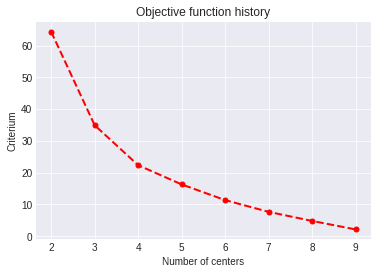

In [ ]:
#Parameters o fuzzy cMeans
membership=2.0
error=0.0001
maxiter=100
FCM_cost_function=[]
maxSeeds=5
jm_array_5=[]
jm_array_final=[]
#em 10 clusters, para cada cluster com 5 seeds aleatorias de 0 a 50
for clusters in range(1,10):
  jm_array_5=[]
  for a in range(0,maxSeeds):
    init_seed=np.random.randint(50)
    cntr, u, u0, d, jm, p, fpc=fuzz.cmeans(x_normalize,clusters,membership,error,maxiter,init=None,seed=init_seed)
    FCM_cost_function.append(fpc)
    #fazer a media dos minimos dos primeiros 5 -> valor para aquele numero C de cluster
    #jm é um vetor com tamanho do numero de interações que demora a convergir
    lowest_JM=np.min(jm)
    #print(lowest_JM)
    jm_array_5.append(lowest_JM)
  jm_array_final.append(np.mean(jm_array_5))

print(len(jm_array_final))
#print(jm_array_final)
  
  #mean = np.mean(FCM_cost_function)
  #FCM_means.append(mean)
  #FCM_cost_function=[]
 
fig = plt.figure()
f1 = fig.add_subplot()
f1.set_title("Objective function history")
f1.set_xlabel("Number of centers")
f1.set_ylabel("Criterium")
f1.plot(np.arange(2,10), jm_array_final[1:], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=5)
#voltar ao jm
#retirar o valor minimo em cada iteração
#fazer a media pelos valores da seeds

In [ ]:
membership=2.0
error=0.0001
maxiter=100
cntr, u, u0, d, jm, p, fpc=fuzz.cmeans(x.values,3,membership,error,maxiter,init=None)


O FCM não pode ser usado para conclusão do melhor numero de clusters a usar !!!

(589, 2)


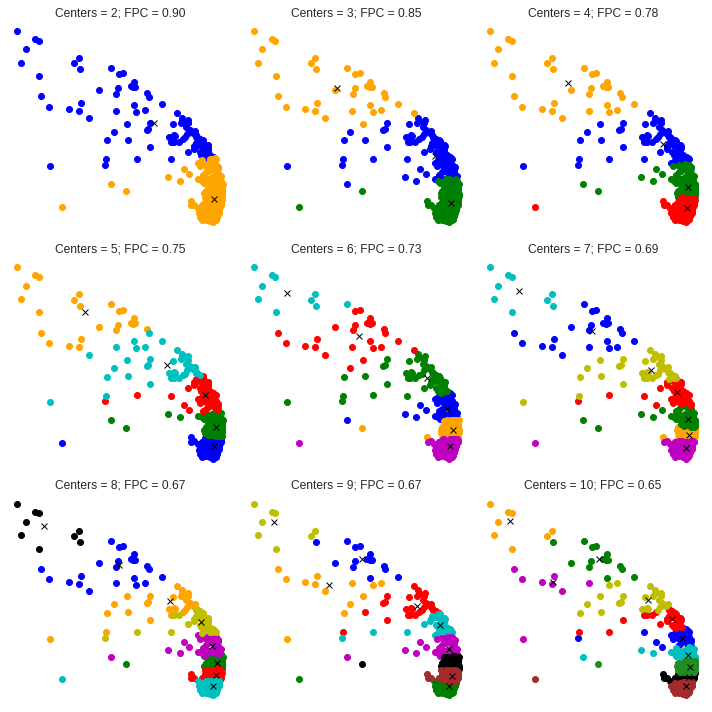

In [ ]:
membership=2.0
error=0.0001
maxiter=100
seed=2
FCM=[]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10))

#svd_n_2d = TruncatedSVD(n_components=3)
#x_n_2d = svd_n_2d.fit_transform(x_normalize)

print(x_n_2d.shape)

for ncenters,ax in enumerate(axes1.reshape(-1), 2):
  cntr, u, u0, d, jm, p, fpc=fuzz.cluster.cmeans(x_n_2d.T,ncenters,membership,error,maxiter,init=None)
   # Store fpc values for later
  FCM.append(fpc)
  # Plot assigned clusters, for each data point in training set
  cluster_membership = np.argmax(u, axis=0)
  for j in range(ncenters):
      #print(cluster_membership)
      ax.plot(x_n_2d[cluster_membership == j, 0],
             x_n_2d[cluster_membership == j, 1],'o', color=colors[j])
  # Mark the center of each fuzzy cluster
  for pt in cntr:
      ax.plot(pt[0], pt[1], 'kx')
  ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
  ax.axis('off')

fig1.tight_layout()

##c) Take the Anomalous Clustering as the initialization algorithm to the fuzzy c-means and apply the Anomalous Patterns_FCM to your data set. 
Discuss the option taken for setting its stop condition. Present and visualize the found fuzzy partitions of AP-FCM taking advantage of the PCA visualization (check PCA tutorial).


In [ ]:
import Anomalous
from scipy.spatial.distance import cdist

def cmeansWithAP(data, threshold, normalization):

  membership=2.0

  me, mmax, mmin, ranges, ancl, cent = Anomalous.ap(normalization, threshold, data)

  ncenters = cent.shape[0]

  #INIT
  d = cdist(data, cent).T
  d = np.fmax(d, np.finfo(np.float64).eps)

  u = d ** (- 2. / (membership - 1))
  u /= np.ones((ncenters, 1)).dot(np.atleast_2d(u.sum(axis=0)))

  init = u

  cntr, u, u0, d, jm, p, fpc=fuzz.cluster.cmeans(data.T, ncenters,membership,error,maxiter,init=init)
  cluster_membership = np.argmax(u, axis=0)
  return cluster_membership, cntr, ncenters

print("Correu")

Correu


Gráfico em 3D

AP com thershold a 60 de forma a criar 5 clusters para tentar imitar as labels originais

In [ ]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

data = x_normalize

#cluster_membership, cntr, ncenters = cmeansWithAP(data,75, 0)
cluster_membership, cntr, ncenters = cmeansWithAP(data,50, 0)

pca_n_3d =  PCA(n_components=3)
x_n_pca_3d = pca_n_3d.fit_transform(x_normalize)
data = x_n_pca_3d

cntr = pca_n_3d.transform(cntr)

import plotly.express as px

df = {'x':np.concatenate((data[:,0], cntr[:,0]), axis=0),
      'y':np.concatenate((data[:,1], cntr[:,1]), axis=0),
      'z':np.concatenate((data[:,2], cntr[:,2]), axis=0),
      #'cluster':np.concatenate((cluster_membership, np.full((ncenters,),-1)), axis=0),
      'cluster':np.concatenate((cluster_membership, range(ncenters)), axis=0),
      'symbol':np.concatenate((np.full((data.shape[0],),1), np.full((ncenters,),4)), axis=0)}
df = pd.DataFrame(df)

fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='cluster',
              symbol='symbol',
              size='symbol', size_max=18,
              opacity=1)

fig.update_traces(showlegend=False)
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(marker=dict(line=dict(width=10,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()



Dados originais já identificados/labelados pelos cientistas -> Groundtruth (Verdade absoluta)

In [ ]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

data = x_normalize

pca_n_3d =  PCA(n_components=3)
x_n_pca_3d = pca_n_3d.fit_transform(x_normalize)
data = x_n_pca_3d


import plotly.express as px

df = {'x':data[:,0],
      'y':data[:,1],
      'z':data[:,2],
      'size':np.full((data.shape[0],),1),
      'cluster':category}
df = pd.DataFrame(df)

fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='cluster',
              size='size', size_max=10,
              opacity=1)


#fig.update_traces(showlegend=False)
#fig.update(layout_coloraxis_showscale=False)
fig.update_traces(marker=dict(line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

AP com threshold a 100 de forma a criar 2 clusters

In [ ]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

data = x_normalize

cluster_membership, cntr, ncenters = cmeansWithAP(data,100, 0)

pca_n_3d =  PCA(n_components=3)
x_n_pca_3d = pca_n_3d.fit_transform(x_normalize)
data = x_n_pca_3d

cntr = pca_n_3d.transform(cntr)

import plotly.express as px

df = {'x':np.concatenate((data[:,0], cntr[:,0]), axis=0),
      'y':np.concatenate((data[:,1], cntr[:,1]), axis=0),
      'z':np.concatenate((data[:,2], cntr[:,2]), axis=0),
      #'cluster':np.concatenate((cluster_membership, np.full((ncenters,),-1)), axis=0),
      'cluster':np.concatenate((cluster_membership, range(ncenters)), axis=0),
      'symbol':np.concatenate((np.full((data.shape[0],),1), np.full((ncenters,),4)), axis=0)}
df = pd.DataFrame(df)

fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='cluster',
              symbol='symbol',
              size='symbol', size_max=18,
              opacity=1)

fig.update_traces(showlegend=False)
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(marker=dict(line=dict(width=10,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()



##d) Discuss the results obtained by Anomalous Patterns FCM for your data case respecting the following:
 (i)location of the initial prototypes; (ii) number of clusters.

##e) Apply validation indices
Like the Adjust Rand Index (ARI) and Xie-Beni, to access the quality of the fuzzy c-partitions obtained in a). Compare these results with the one of Anomalous Patterns FCM getting in c)

Indices para Fuzzy Clustering:

External Indice -> must have labels -> ARI (Adjusted Rand Index) (de 0 a 1, quanto maior melhor)

Internal Indice -> Silhouette Indice ( de -1 a 1, maior valor absoluto melhor)

Fuzzy Indice -> Xie Beni (mais pequeno melhor)

In [ ]:
def make_graphs_indices(title,data1,data2,data3):
  fig = plt.figure()
  f1 = fig.add_subplot()
  f1.set_title(title + " External indice score - Adjusted Rand Indice")
  f1.set_xlabel("Number of centers")
  f1.set_ylabel("ARI index")
  f1.plot(np.arange(2,len(data1)+2),data1, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=5)
  fig = plt.figure()
  f1 = fig.add_subplot()
  f1.set_title(title+ " Fuzzy Indice - Xie Beni" )
  f1.set_xlabel("Number of centers")
  f1.set_ylabel("Xie Beni")
  f1.plot(np.arange(2,len(data2)+2), data2, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=5)
  fig = plt.figure()
  f1 = fig.add_subplot()
  f1.set_title(title+" Internal indice score - Silhouette score" )
  f1.set_xlabel("Number of centers")
  f1.set_ylabel("Silhouette score")
  f1.plot(np.arange(2,len(data3)+2), data3, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=5)

From a)Fuzzy c-partitions

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from cvi import internalIndex

features=new_Dataset.dropna()
pure_labeled, labels = pd.factorize(features['Category'],sort=True)

#Parameters o fuzzy cMeans
membership=2.0
error=0.0001
maxiter=100
FCM_cost_function=[]
maxSeeds=5
ARIndex_array=[]
xieBeni_array=[]
silhouette_array=[]
n_clusters=11

#em 8 clusters, de 2 a 10
for clusters in range(2,n_clusters):
  init_seed=np.random.randint(50)
  cntr, u, u0, d, jm, p, fpc=fuzz.cmeans(x_normalize.T,clusters,membership,error,maxiter,init=None,seed=init_seed)
  predicted=np.argmax(u, axis=0)
  adrand_score = adjusted_rand_score(pure_labeled,predicted)
  ARIndex_array.append(adrand_score)
  
  ##Xie Benni Index
  predicted_XBEN = np.array(predicted)  ## o predict vem da célula de baixo
  #Vamos buscar os valores unicos (clusters encontrados) e codificamos um array com esses valores, tendo a certeza
  # que nenhum cluster é deixado com zero e não dá erro de divisão por zero
  b, c = np.unique(predicted_XBEN, return_inverse=True)
  xie_beni = internalIndex(len(b))
  xb_result=xie_beni.xie_benie(x_normalize, c+1)
  xieBeni_array.append(xb_result)

  si_score = silhouette_score(x_normalize,predicted)
  silhouette_array.append(si_score)

print(ARIndex_array)
print(xieBeni_array)
print(silhouette_array)


[0.3127770637978657, 0.1026846355552463, 0.07358246504489985, 0.07621126401879927, 0.07580711762188005, 0.05796680222080791, 0.05560667352788261, 0.060449745825621924, 0.05986917561498087]
[0.5086060093256727, 1.6746439545166696, 1.8516174123912812, 3.4832656094008665, 12.130152495054631, 4.503335716815425, 16.59273051439062, 5.561383436399535, 10.708761706905884]
[0.3926319834632048, 0.161322605137836, 0.13260181888555064, 0.08508178575570005, 0.07247760913072739, 0.0503883615389917, -0.04605414764982309, -0.09792353876878468, 0.021725896239622296]


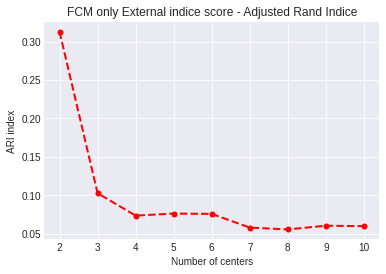

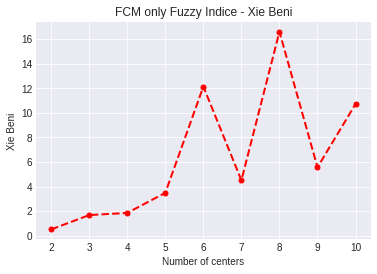

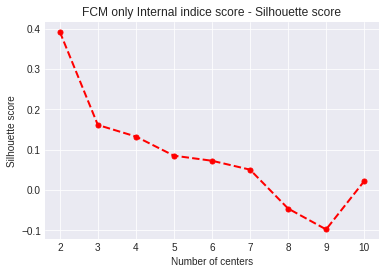

In [ ]:
make_graphs_indices("FCM only",ARIndex_array,xieBeni_array,silhouette_array)

From c)Anomalous Patterns FCM

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score 
from cvi import internalIndex
import scipy as sy

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

#2 -> 80
#3 -> 70
#4 -> 60
#5 -> 50
#6 -> 20
#7 -> 15
#8 -> 10


# clusters: 2----8
thresholds = [80, 70, 60, 50, 20, 15, 10]
ncenters_AP = ncenters

ARIndex_array_AP=[]
xieBeni_array_AP=[]
silhouette_array_AP=[]

for t in thresholds:
  data = x_normalize
  cluster_membership, cntr, ncenters = cmeansWithAP(data, t, 0)

  predicted = cluster_membership
  adrand_score = adjusted_rand_score(pure_labeled,predicted)
  si_score = silhouette_score(x_normalize,predicted) #Calcula a distancia entre inner-cluster e outter-clusters

  predicted_XBEN = np.array(predicted)+1  ## o predict vem da célula de baixo
  xie_beni = internalIndex(ncenters)
  xb_result=xie_beni.xie_benie(x_normalize, predicted+1)

  ARIndex_array_AP.append(adrand_score)
  xieBeni_array_AP.append(xb_result)
  silhouette_array_AP.append(si_score)


print(ARIndex_array_AP)
print(xieBeni_array_AP)
print(silhouette_array_AP)


[0.3127770637978657, 0.1026846355552463, 0.07240187022130401, 0.07849414379130643, 0.07750277413235247, 0.0659966556546037, 0.06026733307411415]
[0.5086060093256727, 1.6746439545166696, 1.8425951302824608, 3.4794841838101846, 15.58981103620575, 5.192464102850779, 5.130092301281211]
[0.3926319834632048, 0.161322605137836, 0.13377224611823108, 0.0921402169886626, 0.013793916605439584, 0.030071789570420473, 0.03803022621495144]


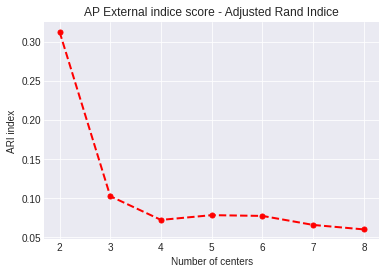

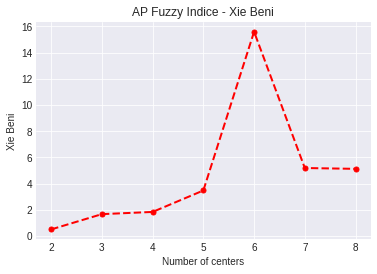

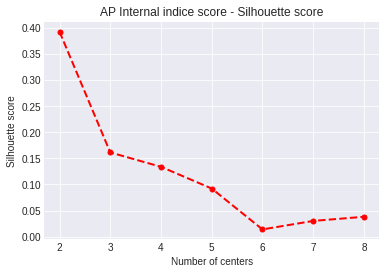

In [ ]:
make_graphs_indices("AP",ARIndex_array_AP,xieBeni_array_AP,silhouette_array_AP)

##f) Make interpretation of the found clusters (after defuzzification) for your data, as discussed in the classes